# Regression 
this script using keras to learn the function of 

1. $ y = 0.5 x + 2$ 
2. $y = sin(x) + 0.3 x $


In [1]:
import keras
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

Using TensorFlow backend.


## Generate fake data

In [2]:
x = np.linspace(-1,1,200)
np.random.shuffle(x)
y = 0.5*x + 2 + np.random.normal(0,0.05,(200,))

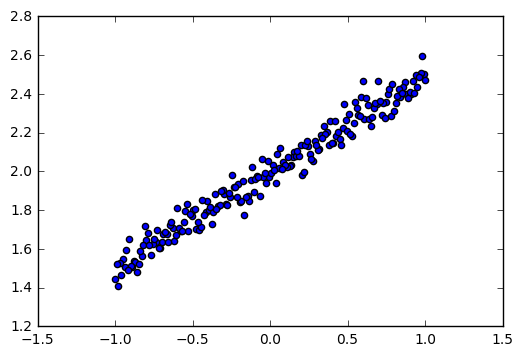

In [3]:
plt.scatter(x,y)
plt.show()

In [4]:
x_train,y_train = x[:160],y[:160]
x_test,y_test = x[160:],y[160:]

### build model 

In [5]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(output_dim=1,input_dim=1))
model.compile(loss='mse',optimizer='sgd')

### Run trainer /testing

In [6]:
print 'training --------'
for step in range(301):
    cost = model.train_on_batch(x_train,y_train)
    if step%100 ==0:
        print 'train cost:',cost

print '\ntesting ---------'
cost = model.evaluate(x_test,y_test,batch_size=40)
print 'test cost:',cost
W,b = model.layers[0].get_weights()
print 'Weight:{},\nbiases:{}'.format(W,b)

training --------
train cost: 4.2416
train cost: 0.147424
train cost: 0.0229264
train cost: 0.00749647

testing ---------
40/40 [==============================] - 0s
test cost: 0.00648716976866
Weight:[[ 0.37894309]],
biases:[ 1.99193013]


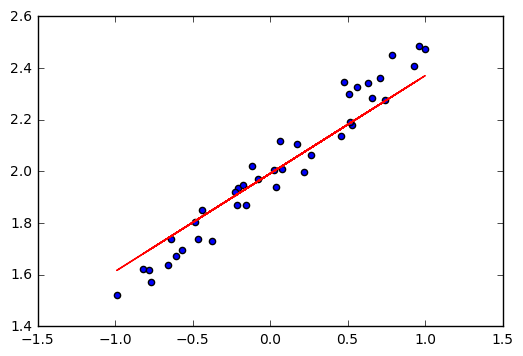

In [7]:
y_pred = model.predict(x_test)
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,'r')

## Generate fake data

In [8]:
np.random.seed(0)

x = np.arange(-10,10,0.05)
noise = 0.5*np.random.randn(len(x))
y = np.sin(x) + 0.3*x + noise


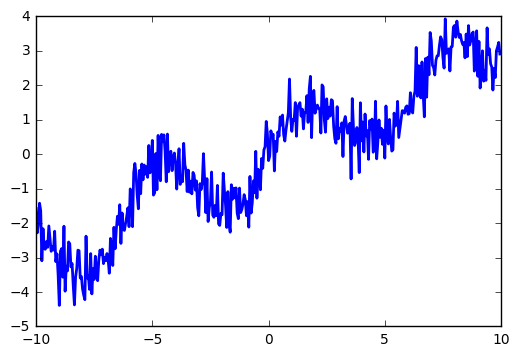

In [9]:
plt.plot(x,y,'b',linewidth=2)

## build baseline model 

In [10]:
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation
from keras.optimizers import SGD,RMSprop,Adagrad,Adam

In [11]:
def base_model():
    # to build fully-connected nn model
    model = Sequential()
    model.add(Dense(output_dim=60 , input_dim=1,activation='relu'))
    model.add(Dense(output_dim=60,activation='relu'))
    model.add(Dense(output_dim=1))
    return model

In [15]:
model = base_model()
model.compile(loss = 'mse',optimizer='rmsprop',metrics=['accuracy'])

In [16]:
%timeit model.fit(x, y, nb_epoch=1000, batch_size=20,verbose=0)

1 loop, best of 3: 26.2 s per loop


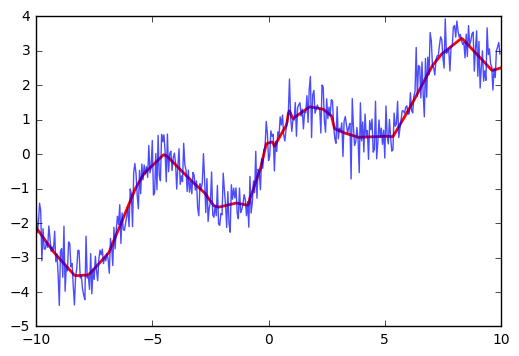

In [17]:
y_pred = model.predict(x)
plt.plot(x,y_pred,color = 'r',linewidth = 2)
plt.plot(x,y,color='b',alpha = 0.7 )
